In [76]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve, circle)

class Drawer:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.img = np.zeros((x, y, 3), dtype=np.double)
        self.img.fill(1)
        fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))
        self.ax = ax

    def __blend(self, rrcc, new_rgb, opacity):
        rr, cc = rrcc
        def get_blended(orig_v, new_v, __opacity):
            return (orig_v * (1- __opacity)) + (new_v * __opacity / 255)
        for i in range(3):
            self.img[rr, cc, i] = get_blended(self.img[rr, cc, i], new_rgb[i], opacity)

    def draw_ellipse(self, ellipse_args, color, opacity):
        rrcc = ellipse(r=ellipse_args[0], c=ellipse_args[1], r_radius=ellipse_args[2], c_radius=ellipse_args[3], shape=self.img.shape, rotation=ellipse_args[4])
        self.__blend(rrcc, color, opacity)

    def draw_polygon(self, rrcc_tup, color, opacity):
        rrcc_arr = np.array(rrcc_tup)
        rrcc = polygon(rrcc_arr[:, 0], rrcc_arr[:, 1], self.img.shape)
        self.__blend(rrcc, color, opacity)

    def show(self):
        self.ax.imshow(self.img)
        plt.show()


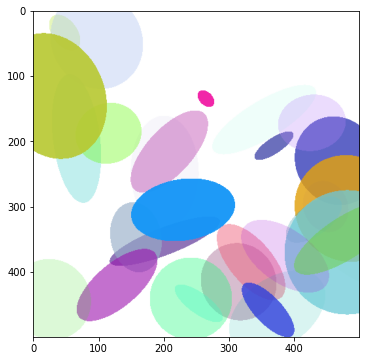

In [80]:
drawer = Drawer(500, 500)
for i in range(30):
    rrcc = np.append(np.random.randint(500, size=2),
        np.random.randint(10, 100, size=2))
    rrcc = np.append(rrcc, np.random.rand(1,1))
    drawer.draw_ellipse(rrcc, np.random.randint(255, size=3), np.random.rand(1,1)[0])

drawer.show()